In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

I  am using a different data set here as the previous one didnt have the ratings data which is important for collaborative filtering
(download dataset from https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings)

In [5]:
df=pd.read_csv("ratings_Beauty.csv")

In [14]:
data=df.copy()
data.head(5)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [9]:
data=data.head(15000)

Creating a pivot table to create matrix  for collaborative filtering

In [12]:
matrix=data.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)


In [13]:
matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B0000535AW,B0000535B4,B0000535BD,B0000535CH,B0000535EM,B0000535EO,B0000535OF,B0000535QU,B0000535QX,B0000535RA
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


transposing it to have product id on left

In [21]:
matrix=matrix.T
X=matrix

decomposing matrix by SVD(works efficiently with vount/tf-idf vectorized,PCA skips less significant components ) for dimension reduction

In [22]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [23]:
SVD = TruncatedSVD(n_components=10)


In [26]:
decomposed = SVD.fit_transform(X)
decomposed.shape

(14410, 10)

In [28]:
decomposed

array([[-1.75725951e-09,  3.82146017e-08,  2.22398305e-08, ...,
         3.86563784e-08, -4.44913369e-06, -7.78123577e-07],
       [-6.82338882e-07,  1.74608538e-05,  7.65183947e-06, ...,
         3.31020193e-05, -1.26756139e-04,  3.48147345e-04],
       [ 3.69619216e-16,  5.32239573e-15, -2.25389576e-16, ...,
        -1.09689917e-13, -1.98382343e-14, -1.36445255e-13],
       ...,
       [ 5.69752555e-02, -4.28880118e-04,  6.73178576e-03, ...,
        -1.98764376e-02,  1.12167541e-01, -5.75165203e-03],
       [ 3.89102621e-05,  1.70999425e-04,  1.97736390e+00, ...,
        -6.53603428e-03, -4.99411289e-03, -2.58781452e-02],
       [ 5.98388886e-03,  8.04658511e-05,  4.21984478e-02, ...,
         4.79916425e-03,  1.13251475e-01,  2.98984935e+00]])

### Pearson's coefficient for centered cosine similarity

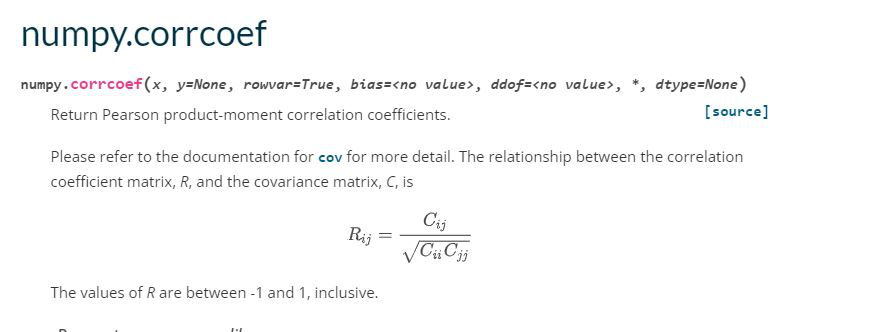

In [32]:
from PIL import Image
myImage = Image.open("pearson.JPG")
myImage

source: https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html

we use pearson corelation for collaborative mostly because it treats zeros as average ,handles tough and easy raters efficiently

In [106]:
correlation_pear = np.corrcoef(decomposed_matrix)
correlation_pear.shape

(14410, 14410)

In [107]:
correlation_pear[:5]

array([[ 1.        , -0.06413505,  0.08676904, ...,  0.69776907,
         0.10532512, -0.82179316],
       [-0.06413505,  1.        ,  0.07753567, ..., -0.12577043,
        -0.10165201, -0.02899842],
       [ 0.08676904,  0.07753567,  1.        , ..., -0.41104996,
         0.03618039, -0.27234975],
       [ 0.69776907, -0.12577043, -0.41104996, ...,  1.        ,
         0.01998929, -0.26813209],
       [ 0.69776907, -0.12577043, -0.41104996, ...,  1.        ,
         0.01998929, -0.26813209]])

In [108]:
prod_names = X.index
prod_names=product_names.tolist()

### picking random product name

In [137]:
val=prod_names[85]
val="AZZ5ENX41WOYZ"
ind=prod_names.index(val)
ind

14401

In [138]:
correlation_product = correlation_pear[ind]
correlation_product.shape,correlation_product

((14410,),
 array([-0.38916075, -0.05599828,  0.19724378, ..., -0.69925104,
        -0.11315902, -0.1185402 ]))

In [139]:
X.index

Index(['A00205921JHJK5X9LNP42', 'A00473363TJ8YSZ3YAGG9',
       'A024581134CV80ZBLIZTZ', 'A03056581JJIOL5FSKJY7',
       'A03099101ZRK4K607JVHH', 'A0505229A7NSH3FRXRR4',
       'A05492663T95KW63BR75K', 'A059547920Q3LZVFHLPI3',
       'A06298653TJ91G7R7MD6R', 'A065995424G4KBBX1V8BO',
       ...
       'AZYQEFB9Y5N22', 'AZZ5ENX41WOYZ', 'AZZ8A0TEQOD7J', 'AZZDA9BRMPP1B',
       'AZZHB6U54UDYW', 'AZZHJZP4GQPPZ', 'AZZNK89PXD006', 'AZZOFVMQC0BJG',
       'AZZQXL8VDCFTV', 'AZZTJQ7CQZUD8'],
      dtype='object', name='UserId', length=14410)

In [166]:
#correlation_product[correlation_product>0.95]

In [141]:
recommedation=[]
recommedation=pd.DataFrame(recommedation)

recommedation["products"]=X.index[correlation_product>0.95]

In [142]:
recommedation["pearson_corr"]=correlation_product[correlation_product>0.95]

In [144]:
ind_rec=recommedation[recommedation["products"]==val].index[0]

In [145]:
recommedation=recommedation.drop(0)

In [146]:
recommedation

,products,pearson_corr
1,A112TFLXGBF6NI,0.999890
2,A116MBJQU5SC8W,0.999888
3,A11L8FAXNCSV44,0.999888
4,A11PV74FPA9W9N,0.999888
5,A12G40AZ9JW0OL,0.999888
...,...,...
463,AYV5MKEX4930Q,1.000000
464,AZ2NEHE8TNRUW,0.999889
465,AZ7UGIC7OWVV0,0.991316
466,AZZ5ENX41WOYZ,1.000000


In [150]:
recommedation=recommedation.sort_values('pearson_corr',ascending=False)
recommedation

,products,pearson_corr
106,A1UBXJQ4Y434G1,1.000000
331,A3PI8OSXZ82Y6X,1.000000
135,A25UGUXUG0Q0N0,1.000000
456,AX75ZK92N9IAC,1.000000
466,AZZ5ENX41WOYZ,1.000000
...,...,...
204,A2OIJZN085E27W,0.977138
79,A1MO7ERE6X74JE,0.977138
280,A39D8V77QC0MZR,0.977138
276,A37FQL3TLE9TKT,0.977138


In [148]:
recommedation["products"].head(10)

106    A1UBXJQ4Y434G1
368     A7GWFBC3EBEB1
150     A2ALUZZD2V8F4
92     A1PTM31HY022YZ
418     AMGOM2K7DFTVN
65     A1IDEH80N7O1TT
120    A1ZR4G95FE1PKS
152    A2B3DIT71R4LVM
165    A2FBT3BI4A8WZM
286    A3AVDVWIZO4OKE
Name: products, dtype: object

# Creating function

In [163]:
def product_recommend(product):
    val=product
    ind=prod_names.index(val)
    correlation_product = correlation_pear[ind]
    print(ind,product)
    recommedation=[]
    recommedation=pd.DataFrame(recommedation)
    recommedation["products"]=X.index[correlation_product>0.95]
    recommedation["pearson_corr"]=correlation_product[correlation_product>0.95]
    ind_rec=recommedation[recommedation["products"]==product].index[0]
    recommedation=recommedation.drop(ind_rec)
    recommedation=recommedation.sort_values('pearson_corr',ascending=False)
    
    return(recommedation.head(10))



In [164]:
product_recommend("A10Y5QN4DDL33A")

115 A10Y5QN4DDL33A


,products,pearson_corr
292,A3CQ3FOM5APBRA,1.0
376,A9KRD46772V9L,1.0
312,A3JEP6B24WNBDX,1.0
331,A3PI8OSXZ82Y6X,1.0
50,A1FP2TF9CH5ISH,1.0
430,AR0EX4KO0V21R,1.0
363,A69ZX7310T8KY,1.0
286,A3AVDVWIZO4OKE,1.0
19,A164UKBIPD05NJ,1.0
65,A1IDEH80N7O1TT,1.0
